# 第1章　Anacondaを利用した環境構築

## 仮想環境の構築
- Anaconda promptを開く
- conda create -n jupyter-env python=3.6  と入力
- Proceedと聞いてくるのでEnterを入力

## 作成した仮想環境を利用する
- activate jupyter-env と入力

## ライブラリをバージョン指定してインストール
- conda install -y jupyter==1.0.0  
- conda install -y pandas==0.19.2
- conda install -y matplotlib==2.0.1

- -yオプションは確認フローを省略できる

- パッケージのアップデート：　conda update jupyter
- パッケージの削除: conda remove jupyter

## 作成したconda環境の一覧
conda env list

- アスタリスクが付いているの仮想環境が現在のアクティベート

## conda環境を終了する
deactivate jupyter-env

## 作成した環境を削除する
- conda remove -y -n jupyter-env --all

## matplotlibを日本語化する

In [9]:
# matplotlibの設定ファイル参照先を確認する(設定ファイルはmatplotlibrc)
from matplotlib import matplotlib_fname
matplotlib_fname()

'C:\\Users\\mikam\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

## matplotlibrcの読み込み優先順位
- ① 現在のワーキングディレクトリにあるmatplotlibrc
- ② MATPLOTLIBRC/matplotlibrc
- ③ HOME/.config/matplotlib/matplotlibrc
- ④ matplotlibパッケージがインストールされたディレクトリのmpl-data/matplotlibrc

# 第2章　JupyterNotebookの操作

- クラスや関数名などの末尾に?を付与して実行すると「Docstring」を参照出来る
-　対象の末尾に入力カーソルを置いた状態でshift+ Tabを押すとツールチップが表示される

## マジックコマンドの基本

In [10]:
#　現在のディレクトリをひょうじする
%pwd

'D:\\Python\\PythonユーザのためのJupyter入門'

In [12]:
# 実行時間を計測するコマンド　%time
%time sum(range(10000))

Wall time: 0 ns


49995000

In [13]:
# 実行時間を複数回行う　%timeit
%timeit sum(range(10000))

160 µs ± 4.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
# コードセルの実行履歴を一覧で取得
%history -l 3

# 1000回の繰り返しを3回やる場合
%%timeit -n 1000 -r 3

for i in range(1000):
    i * 2
# 1000回の繰り返しを3回やる場合
%timeit -n 1000 -r 3

for i in range(1000):
    i * 2
# 1000回の繰り返しを3回やる場合
%timeit -n 1000 -r 3

for i in range(1000):
    i * 2


In [20]:
# カレントディレクトリのファイル一覧を取得
%ls

 ドライブ D のボリューム ラベルは DATA です
 ボリューム シリアル番号は 8E0D-4CBA です

 D:\Python\PythonユーザのためのJupyter入門 のディレクトリ

2020/08/10  09:50    <DIR>          .
2020/08/10  09:50    <DIR>          ..
2020/08/10  08:48    <DIR>          .ipynb_checkpoints
2020/08/10  08:47    <DIR>          anime
2020/08/10  09:50             5,235 Untitled.ipynb
               1 個のファイル               5,235 バイト
               4 個のディレクトリ  579,392,835,584 バイトの空き領域


In [21]:
# matplotlib画像の設定

# %matplotlib inlineでセル直下にグラフが描画
# %matplotlib tkで別ウィンドウにインタラクティブなグラフが表示
# %matplotlib notebookでセル直下にインタラクティブなグラフができる

# 第3章　pandasでデータ処理

## 3-3 Series

In [22]:
import pandas as pd

ser = pd.Series([1,2,3], index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [23]:
# indexを省略
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [24]:
# ラベルを使用してデータ選択
ser.loc['b']

2

In [25]:
# ラベルを使用しない方法
ser['b']

2

In [26]:
# ラベルの範囲指定
ser.loc['b':'c']

b    2
c    3
dtype: int64

In [27]:
# 複数の要素指定
ser.loc[['a', 'c']]

a    1
c    3
dtype: int64

In [28]:
# 位置を指定
ser.iloc[1]

2

In [29]:
ser.iloc[1:3]

b    2
c    3
dtype: int64

In [30]:
# 真偽値を使ってデータ選択
ser.loc[[True, False, True]]

a    1
c    3
dtype: int64

In [31]:
# 比較演算子を使って真偽値を返す
ser !=2

a     True
b    False
c     True
dtype: bool

In [32]:
ser[ser !=2]

a    1
c    3
dtype: int64

## 3-4 DataFrame

In [33]:
df = pd.DataFrame([[1,10,100],[2,20,200], [3,30,300]],
                  index=['r1', 'r2', 'r3'],
                  columns=['c1', 'c2', 'c3']
)
df

,c1,c2,c3
r1,1,10,100
r2,2,20,200
r3,3,30,300


In [34]:
# ラベルを使ってデータを選択する
df.loc['r2', 'c2']

20

In [35]:
# 全ての列をしているする場合
df.loc['r2',:]

c1      2
c2     20
c3    200
Name: r2, dtype: int64

In [36]:
# 全ての行を指定する場合
df.loc[:,'c2']

r1    10
r2    20
r3    30
Name: c2, dtype: int64

In [37]:
# スライスやリストの渡し方
df.loc[['r1', 'r3'], 'c2':'c3']

,c2,c3
r1,10,100
r3,30,300


In [38]:
# ilocを使ってデータを選択
df.iloc[1:3, [0,2]]

,c1,c3
r2,2,200
r3,3,300


In [39]:
# 列名を指定してデータを選択
df['c1']

r1    1
r2    2
r3    3
Name: c1, dtype: int64

In [40]:
#真偽値を使ってデータを選択する
df > 10

,c1,c2,c3
r1,False,False,True
r2,False,True,True
r3,False,True,True


In [41]:
df.loc[df['c2'] > 10]

,c1,c2,c3
r2,2,20,200
r3,3,30,300


In [43]:
# 2つ以上の条件を組み合わせる
# & : and条件
# | : or条件

# c1列が1より大きくかつ、c3列が300より小さいデータ
df.loc[(df['c1'] > 1) & (df['c3'] < 300)]

,c1,c2,c3
r2,2,20,200


## 3-5 様々なデータの読み込み

In [44]:
# csvファイルを読み込む

anime_csv = 'anime/anime.csv'
df = pd.read_csv(anime_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### 指定した列をインデックスにする

In [45]:
# インデックスにする列を指定
df = pd.read_csv(anime_csv, index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [47]:
# インデックスにする列を列名で指定
df = pd.read_csv(anime_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### 指定した列を指定した型で読み込む

In [48]:
#キーワード引数dtypeに列名と型を指定すると指定した型で読み込み出来る
df = pd.read_csv(anime_csv, dtype={'members': float})
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0


### datatime型の列が含まれている場合

In [51]:
# キーワード引数parse_datesに列名をリストで指定すると読み込み時に型変換する

anime_stock_price_csv = 'anime/anime_stock_price.csv'
df = pd.read_csv(anime_stock_price_csv, parse_dates=['Date'])
df.dtypes

Date              datetime64[ns]
TOEI ANIMATION           float64
IG Port                  float64
dtype: object

### 区切り文字を変更する

In [53]:
#　キーワード引数sepに文字列を指定する
df = pd.read_csv('anime/anime.tsv', sep='\t')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
10481,34471,Youkai Watch Movie 4,"Comedy, Kids, Supernatural",Movie,1,NaN,169
10482,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593
10483,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
10484,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


## Excelファイルを読み込む

In [55]:
anime_xlsx = 'anime/anime.xlsx'

df = pd.read_excel(anime_xlsx)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
2,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
3,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
4,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


## 読み込むシートを指定する

In [56]:
df = pd.read_excel(anime_xlsx, sheet_name='Movie')

## HTMLファイルを読む

In [66]:
url = 'https://docs.python.org/3/py-modindex.html'

tables = pd.read_html(url, index_col=1)

#1番目のDataFrameから空の列と欠損値を除外
tables[0].loc[:,1:].dropna().head(10)

,2
1,
__future__,Future statement definitions
__main__,The environment where the top-level script is ...
_dummy_thread,Drop-in replacement for the _thread module.
_thread,Low-level threading API.
abc,Abstract base classes according to :pep:`3119`.
aifc,Read and write audio files in AIFF or AIFC for...
argparse,Command-line option and argument parsing library.
array,Space efficient arrays of uniformly typed nume...
ast,Abstract Syntax Tree classes and manipulation.


## 3-6 データ処理

### 真偽値でデータを抽出する

In [67]:
anime_csv ='anime/anime.csv'
df = pd.read_csv(anime_csv)

df.loc[df['episodes'] == 'Unknown'].head()

,anime_id,name,genre,type,episodes,rating,members
73,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
248,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
607,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
993,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
1226,21639,Yu☆Gi☆Oh! Arc-V,"Action, Fantasy, Game, Shounen",TV,Unknown,7.61,17571


### whereメソッドでデータを抽出する

In [68]:
# 抽出時に該当しないデータをNaNで埋めたDataFrameを返す

df.where(df['rating'] < 9.2).head()

,anime_id,name,genre,type,episodes,rating,members
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9253.0,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969.0,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0


### 値を変更する

In [70]:
# ラベルを指定し値を代入することで値が書き換わる

import numpy as np

df.loc[74, 'episodes'] = np.nan
df.loc[74, 'episodes']

nan

In [78]:
# 複数の値を変更する
df.loc[df['episodes'] == 'Unknown'] = np.nan

### 欠損値を除外する

In [79]:
# isnull()は欠損値である場合Trueを返す

df.loc[df['episodes'].isnull()].head()

,anime_id,name,genre,type,episodes,rating,members
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,801.0,Ghost in the Shell: Stand Alone Complex 2nd GIG,"Action, Mecha, Military, Mystery, Police, Sci-...",TV,NaN,8.57,113993.0
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 欠損値が含まれているデータを除外

In [80]:
df.dropna().loc[70:].head()

,anime_id,name,genre,type,episodes,rating,members
70,578.0,Hotaru no Haka,"Drama, Historical",Movie,1,8.58,174878.0
71,16894.0,Kuroko no Basket 2nd Season,"Comedy, School, Shounen, Sports",TV,25,8.58,243325.0
72,5028.0,Major S5,"Comedy, Drama, Romance, Sports",TV,25,8.58,28653.0
75,31933.0,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,39,8.57,74074.0
76,5205.0,Kara no Kyoukai 7: Satsujin Kousatsu (Kou),"Action, Mystery, Romance, Supernatural, Thriller",Movie,1,8.57,95658.0


In [82]:
# dropnaは非破壊的操作
# dfの中身を書き換える場合はinplace=True

df.dropna(inplace=True)
df.loc[70:].head()

,anime_id,name,genre,type,episodes,rating,members
70,578.0,Hotaru no Haka,"Drama, Historical",Movie,1,8.58,174878.0
71,16894.0,Kuroko no Basket 2nd Season,"Comedy, School, Shounen, Sports",TV,25,8.58,243325.0
72,5028.0,Major S5,"Comedy, Drama, Romance, Sports",TV,25,8.58,28653.0
75,31933.0,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,39,8.57,74074.0
76,5205.0,Kara no Kyoukai 7: Satsujin Kousatsu (Kou),"Action, Mystery, Romance, Supernatural, Thriller",Movie,1,8.57,95658.0


### データの型

In [83]:
# Seriesのデータ型を確認する場合
df['anime_id'].dtype

dtype('float64')

In [84]:
# dfの型を確認する
df.dtypes

anime_id    float64
name         object
genre        object
type         object
episodes     object
rating      float64
members     float64
dtype: object

### データの型変換

In [85]:
# 型変換する場合はastype()

# pandasで表示する行数を設定
pd.options.display.max_rows= 10
df['episodes'].astype(np.int64)

0         1
1        64
2        51
3        24
4        51
         ..
10272     1
10273    23
10274     1
10275     1
10276    32
Name: episodes, Length: 10075, dtype: int64

### 複数の型を変更する場合

In [87]:
df.astype({'episodes': np.int64, 'rating' : np.float64})

,anime_id,name,genre,type,episodes,rating,members
0,32281.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
1,5114.0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
2,28977.0,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262.0
3,9253.0,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969.0,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0
...,...,...,...,...,...,...,...
10272,11095.0,Zouressha ga Yatte Kita,Adventure,Movie,1,6.06,78.0
10273,7808.0,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172.0
10274,28543.0,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"Drama, Kids",OVA,1,5.83,50.0
10275,18967.0,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"Comedy, Historical, Sci-Fi",OVA,1,6.13,76.0


In [89]:
# astype()は非破壊的
df.dtypes

anime_id    float64
name         object
genre        object
type         object
episodes     object
rating      float64
members     float64
dtype: object

### DataFrameを書き換える場合

In [90]:
df['episodes'] = df['episodes'].astype(np.int64)
df.dtypes

anime_id    float64
name         object
genre        object
type         object
episodes      int64
rating      float64
members     float64
dtype: object

## ソートする

In [91]:
# データを並び替えるにはsort_values()
# sort_valuesは非破壊的、データ書き換える場合はinplace=True

df.sort_values(by='rating', ascending=False).head()

,anime_id,name,genre,type,episodes,rating,members
9846,33662.0,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13.0
8985,23005.0,Mogura no Motoro,Slice of Life,Movie,1,9.50,62.0
0,32281.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
8474,33607.0,Kahei no Umi,Historical,Movie,1,9.33,44.0
1,5114.0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0


### 関数を適用する
- map 　   : Series(値ごと)に適用　　　　　　　 →戻り値はSeries
- apply    : DataFrame(列または行ごと)に適用　 →戻り値はSeries
- applymap : DataFrame(値ごと)に適用　　　　→戻り値はDataFrame

#### mapメソッドの適用

In [92]:
import html

print(df['name'].head())
print('############')
print(df['name'].map(html.unescape).head())

0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                       Gintama&#039;
Name: name, dtype: object
############
0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                            Gintama'
Name: name, dtype: object


#### applyメソッドによる関数の適用

In [93]:
df.apply(len)

anime_id    10075
name        10075
genre       10075
type        10075
episodes    10075
rating      10075
members     10075
dtype: int64

#### applyメソッドによる行に対しての関数の適用

In [94]:
df.apply(len, axis=1).head()

0    7
1    7
2    7
3    7
4    7
dtype: int64

In [95]:
# applyメソッドに渡された関数に渡される引数はSeries型
df.apply(type)

anime_id    <class 'pandas.core.series.Series'>
name        <class 'pandas.core.series.Series'>
genre       <class 'pandas.core.series.Series'>
type        <class 'pandas.core.series.Series'>
episodes    <class 'pandas.core.series.Series'>
rating      <class 'pandas.core.series.Series'>
members     <class 'pandas.core.series.Series'>
dtype: object

In [97]:
# 適用する関数の中でラベルを指定できる

df.apply(lambda x : len(x['name']) + len(x['genre']), axis=1).head()

0    50
1    91
2    68
3    27
4    73
dtype: int64

#### applymapメソッドによる関数適用

In [98]:
df[['name', 'genre']].applymap(len).head()

,name,genre
0,14,36
1,32,59
2,8,60
3,11,16
4,13,60


## 3-7 統計量の算出

In [99]:
anime_master_csv ='anime/anime_master.csv'
df= pd.read_csv(anime_master_csv)

In [101]:
# 列ごとの平均値の算出
df.mean()

anime_id    14055.982035
episodes       13.939156
rating          6.507956
members     18924.950769
dtype: float64

In [103]:
# Seriesにおいても同様
df['members'].mean()

18924.95076923077

#### 基本統計量を算出する

In [104]:
df.describe().round(1)

,anime_id,episodes,rating,members
count,10075.0,10075.0,10075.0,10075.0
mean,14056.0,13.9,6.5,18925.0
std,11294.9,50.8,1.1,57117.5
min,1.0,1.0,1.7,12.0
25%,3431.0,1.0,5.9,177.0
50%,10526.0,1.0,6.6,1227.0
75%,24438.0,13.0,7.3,10254.0
max,34519.0,1818.0,10.0,1013917.0


In [105]:
# パーセントタイル値を変更する場合
df.describe(percentiles=[0.1,0.9]).round(1)

,anime_id,episodes,rating,members
count,10075.0,10075.0,10075.0,10075.0
mean,14056.0,13.9,6.5,18925.0
std,11294.9,50.8,1.1,57117.5
min,1.0,1.0,1.7,12.0
10%,1259.4,1.0,5.1,74.0
50%,10526.0,1.0,6.6,1227.0
90%,31190.0,37.0,7.8,47587.6
max,34519.0,1818.0,10.0,1013917.0


In [106]:
# 非数値の列に対してdescrbe()メソッドを使用した場合
# count:欠損値を除いたデータ数
# unique:ユニークなデータ数
# top: データ数が最も多い値
# freq: topのデータ数


df[['genre', 'type']].describe()

,genre,type
count,10075,10075
unique,2735,6
top,Comedy,TV
freq,500,3330


## 3-8　クロス集計

#### groupbyメソッドで集約する

In [107]:
anime_master_csv ='anime/anime_master.csv'
df= pd.read_csv(anime_master_csv)

grouped = df.groupby('type')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [108]:
# 集約されたデータの平均値
grouped.mean().round(1)

,anime_id,episodes,rating,members
type,,,,
Movie,14322.5,1.1,6.3,10654.0
Music,22495.1,1.1,5.6,1273.0
ONA,22738.0,6.8,5.6,4401.8
OVA,12207.7,2.5,6.5,6849.5
Special,16802.3,2.5,6.5,7424.6
TV,10929.6,37.5,6.9,41832.3


In [111]:
# 集約されたデータの基本統計量
grouped.describe().round(1).head(16)

anime_id                                                               \
           count     mean      std    min      25%      50%      75%      max   
type                                                                            
Movie     2220.0  14322.5  10925.7    5.0   4396.8  10677.5  24071.5  34201.0   
Music      485.0  22495.1  10175.0  731.0  12101.0  24903.0  31925.0  34412.0   
ONA        591.0  22738.0  10346.0  574.0  13467.0  25241.0  32287.5  34514.0   
OVA       1932.0  12207.7  10718.7   44.0   2297.2   8965.5  22459.5  34349.0   
Special   1517.0  16802.3  10838.8  191.0   6877.0  15815.0  27821.0  34519.0   
TV        3330.0  10929.6  10645.4    1.0   2112.2   6511.5  18938.5  34503.0   

        episodes        ... rating       members                          \
           count  mean  ...    75%   max   count     mean      std   min   
type                    ...                                                
Movie     2220.0   1.1  ...    7.3  10.0  2220.0  10654.0  31603.6  13.0   
Music      485.0   1.1  ...    6.2   8.4   485.0   1273.0   4489.0  24.0   
ONA        591.0   6.8  ...    6.4   8.3   591.0   4401.8  12994.9  25.0   
OVA       1932.0   2.5  ...    7.1   9.2  1932.0   6849.5  17479.7  17.0   
Special   1517.0   2.5  ...    7.1   8.7  1517.0   7424.6  15666.1  24.0   
TV        3330.0  37.5  ...    7.5   9.3  3330.0  41832.3  89925.6  12.0   

                                            
           25%     50%      75%        max  
type                                        
Movie    119.0   489.5   4239.0   466254.0  
Music     97.0   226.0    797.0    71136.0  
ONA      108.5   336.0   1890.5   144898.0  
OVA      122.0  1027.0   5706.0   305165.0  
Special  298.0  1906.0   6978.0   160423.0  
TV       443.0  5617.0  41568.2  1013917.0  

[6 rows x 32 columns]

In [113]:
# 複数の要素で集約する場合
df.groupby(['type', 'episodes']).mean().round(1).head(20)

anime_id  rating  members
type  episodes                           
Movie 1          14320.0     6.3  10588.6
      2          13802.0     6.9   6638.9
      3          11339.3     6.7  53598.1
      4          15723.5     7.3   3566.5
      5          12558.3     6.1   3641.0
...                  ...     ...      ...
Music 5          14359.0     6.2   1582.0
      7           8348.0     7.1  13361.0
      8           4705.0     7.3  22213.0
      14          5016.0     6.7   2240.0
      24         32633.0     7.6    560.0

[20 rows x 3 columns]

#### pivot_tableメソッドで集約する

In [114]:
# キーワード引数indexに集約対象の列名、aggfuncに集計する関数を指定
df.pivot_table(index='type', aggfunc=np.mean)

,anime_id,episodes,members,rating
type,,,,
Movie,14322.477928,1.100901,10654.022072,6.328599
Music,22495.111340,1.125773,1273.028866,5.583918
ONA,22738.000000,6.778342,4401.822335,5.629628
OVA,12207.692547,2.549689,6849.526398,6.475217
Special,16802.341463,2.495715,7424.628873,6.525577
TV,10929.554655,37.456156,41832.314414,6.928961


In [115]:
# 複数列の場合
df.pivot_table(index=['type', 'episodes'], aggfunc=np.mean)

anime_id       members    rating
type  episodes                                      
Movie 1         14320.010507  10588.556418  6.325464
      2         13802.000000   6638.875000  6.930000
      3         11339.285714  53598.142857  6.661429
      4         15723.500000   3566.500000  7.260000
      5         12558.333333   3641.000000  6.063333
...                      ...           ...       ...
TV    1428       8213.000000    194.000000  6.050000
      1471       6277.000000    406.000000  6.480000
      1565      23349.000000    116.000000  5.560000
      1787       2471.000000  14233.000000  7.760000
      1818      12393.000000    160.000000  6.180000

[291 rows x 3 columns]

### クロス集計する
- 1:カンマ区切りで入力されているgenre列をユニークにして取り出す
- 2:元のDFから1を取り出す
- 3:2を結合

In [121]:
# genres列のカンマ区切りのデータを分割
genres = df['genre'].map(lambda x : x.split(','))

# numpy.arrayにして2次元から1次元のデータに変換
ser = pd.Series(np.hstack(genres.values))

# ユニークにする
unique_genres = ser.str.strip().unique()
unique_genres.sort()
unique_genres

array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
       'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance',
       'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai',
       'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports',
       'Super Power', 'Supernatural', 'Thriller', 'Vampire'], dtype=object)

In [127]:
# genreごとのDataFrameを結合する前処理

#指定したジャンル名をDataFrameから抽出
def filter_df_by_genre(df, genre):
    genre_df = df.loc[df['genre'].map(lambda x: genre in x)].copy()
    genre_df['genre'] = genre
    return genre_df

In [135]:
# 関数を全てのジャンルに対して実行
genre_df_list = [filter_df_by_genre(df,genre) for genre in unique_genres]

# 上記dataを統合
df2 = pd.concat(genre_df_list)
# name列でソート
df2.sort_values('name', inplace=True)

# メンバ数が多いジャンルトップ10
top10 = df2.groupby('genre')['members'].sum().sort_values(ascending=False).index[:10]

# top10からデータを抽出
df2 = df2[df2['genre'].isin(top10)]
df2

,anime_id,name,genre,type,episodes,rating,members
2943,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Comedy,OVA,1,7.06,14351
2943,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",School,OVA,1,7.06,14351
2943,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Fantasy,OVA,1,7.06,14351
1376,8481,"""Bungaku Shoujo"" Memoire",School,OVA,3,7.54,18013
1376,8481,"""Bungaku Shoujo"" Memoire",Drama,OVA,3,7.54,18013
...,...,...,...,...,...,...,...
474,793,xxxHOLiC Movie: Manatsu no Yoru no Yume,Comedy,Movie,1,8.04,41547
209,6864,xxxHOLiC Rou,Supernatural,OVA,2,8.32,36353
334,4918,xxxHOLiC Shunmuki,Supernatural,OVA,2,8.17,40401
334,4918,xxxHOLiC Shunmuki,Drama,OVA,2,8.17,40401


In [141]:
df2.loc[df2['name'] == 'Kimi no Na wa.']

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,School,Movie,1,9.37,200630


In [142]:
# genre列とtype列のクロス集計

df2.pivot_table(index='genre', columns='type',
               values=['members'], aggfunc=np.sum).head()

members                                                       
type            Movie     Music        ONA        OVA    Special          TV
genre                                                                       
Action     10224960.0   77054.0   524907.0  5793680.0  3412689.0  63364032.0
Adventure   9485223.0   42829.0    70431.0  2373765.0  2052024.0  27529975.0
Comedy      7293127.0   20860.0  1477266.0  5614758.0  6659293.0  65420862.0
Drama       9034099.0  100734.0   188427.0  3043374.0  1915578.0  41011557.0
Fantasy     8019406.0   43962.0   188937.0  2754224.0  2504131.0  34932563.0

## 3-9 時系列データの処理

In [144]:
anime_stock_price_csv = 'anime/anime_stock_price.csv'
df = pd.read_csv(anime_stock_price_csv, index_col=0, parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


### 時系列データで使用される関数

In [148]:
# pct_change()で1つ前の値からの変化率を算出

pct_change= df['TOEI ANIMATION'].pct_change()
pct_change

Date
2015-01-01         NaN
2015-01-02    0.000000
2015-01-05    0.011695
2015-01-06   -0.010114
2015-01-07   -0.018978
                ...   
2016-12-26    0.001725
2016-12-27    0.010326
2016-12-28    0.015333
2016-12-29    0.013422
2016-12-30    0.000000
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [149]:
# cumprod()で累積積を算出
cumulative_returns = (pct_change + 1).cumprod()
cumulative_returns

Date
2015-01-01         NaN
2015-01-02    1.000000
2015-01-05    1.011695
2015-01-06    1.001463
2015-01-07    0.982457
                ...   
2016-12-26    1.722833
2016-12-27    1.740624
2016-12-28    1.767312
2016-12-29    1.791034
2016-12-30    1.791034
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [150]:
# rollingメソッドでデータ範囲を移動させながら関数を適用、第一引数に区間を指定

#過去5日間の移動平均を求める
df['TOEI ANIMATION'].rolling(5).mean()

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07    3353.916
                ...   
2016-12-26    5793.260
2016-12-27    5799.232
2016-12-28    5821.132
2016-12-29    5868.912
2016-12-30    5916.692
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [153]:
# 20日間のヒストリカルボラティリティ

def historical_volatility(x):
    logreturns = np.diff(np.log(x)) # 対数収益率
    return np.sqrt(365 * logreturns.var())

df['TOEI ANIMATION'].rolling(20).apply(historical_volatility)

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys


Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2016-12-26    0.158355
2016-12-27    0.163235
2016-12-28    0.170891
2016-12-29    0.172681
2016-12-30    0.151983
Name: TOEI ANIMATION, Length: 522, dtype: float64

## DatetimeIndex

In [154]:
# DatetimeIndexはdetetime型に特化した処理が出来るindex

ix = pd.date_range('2017-01', '2017-02', freq='1H')
ix

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-31 15:00:00', '2017-01-31 16:00:00',
               '2017-01-31 17:00:00', '2017-01-31 18:00:00',
               '2017-01-31 19:00:00', '2017-01-31 20:00:00',
               '2017-01-31 21:00:00', '2017-01-31 22:00:00',
               '2017-01-31 23:00:00', '2017-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

#### SeriesやDataFrameのインデックスとして使用する場合

In [155]:
time_series = pd.Series(np.arange(len(ix)), index=ix)
time_series

2017-01-01 00:00:00      0
2017-01-01 01:00:00      1
2017-01-01 02:00:00      2
2017-01-01 03:00:00      3
2017-01-01 04:00:00      4
                      ... 
2017-01-31 20:00:00    740
2017-01-31 21:00:00    741
2017-01-31 22:00:00    742
2017-01-31 23:00:00    743
2017-02-01 00:00:00    744
Freq: H, Length: 745, dtype: int32

## 時系列データを抽出する

In [156]:
# DatetimeIndexはdatetime型と文字型の両方が指定出来る

from datetime import datetime

df.loc[datetime(2016,1,4)]

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [157]:
# 文字列を指定する場合
df.loc['2016-01-04']

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [158]:
# 特定の年や月のデータのみを抽出する場合
print(df.loc['2015'].head())

            TOEI ANIMATION  IG Port
Date                               
2015-01-01         3356.86  1201.51
2015-01-02         3356.86  1201.51
2015-01-05         3396.12  1218.44
2015-01-06         3361.77  1201.51
2015-01-07         3297.97  1202.51


In [159]:
# 月を指定した場合
print(df.loc['2015-05'].head())

            TOEI ANIMATION  IG Port
Date                               
2015-05-01         3567.29  1168.66
2015-05-04         3567.29  1168.66
2015-05-05         3567.29  1168.66
2015-05-06         3567.29  1168.66
2015-05-07         3577.18  1169.66


In [160]:
# 年や月を指定してスライスする場合
print(df.loc['2015-12' : '2016-01'])

            TOEI ANIMATION  IG Port
Date                               
2015-12-01         5947.13   910.41
2015-12-02         5917.44   896.45
2015-12-03         5917.44   893.46
2015-12-04         5867.97   888.47
2015-12-07         5917.44   892.46
...                    ...      ...
2016-01-25         5452.36   704.99
2016-01-26         5491.94   702.00
2016-01-27         5521.63   721.94
2016-01-28         5679.95   733.91
2016-01-29         5670.06   739.89

[44 rows x 2 columns]


In [161]:
# 指定した時刻のみのデータを抽出する場合

from datetime import time

time_series.loc[time(9,0)]

2017-01-01 09:00:00      9
2017-01-02 09:00:00     33
2017-01-03 09:00:00     57
2017-01-04 09:00:00     81
2017-01-05 09:00:00    105
                      ... 
2017-01-27 09:00:00    633
2017-01-28 09:00:00    657
2017-01-29 09:00:00    681
2017-01-30 09:00:00    705
2017-01-31 09:00:00    729
Freq: 24H, Length: 31, dtype: int32

In [162]:
# 指定した時間帯のみを抽出する場合
# between_time()で指定した時間帯のみを抽出

time_series.between_time(time(9,0), time(12,0))

2017-01-01 09:00:00      9
2017-01-01 10:00:00     10
2017-01-01 11:00:00     11
2017-01-01 12:00:00     12
2017-01-02 09:00:00     33
                      ... 
2017-01-30 12:00:00    708
2017-01-31 09:00:00    729
2017-01-31 10:00:00    730
2017-01-31 11:00:00    731
2017-01-31 12:00:00    732
Length: 124, dtype: int32

### リサンプリング

In [163]:
# resampleメソッドを使用する事で時系列データの頻度を変換できる

# 月次の株価の平均
df['TOEI ANIMATION'].resample('M').mean().head()

Date
2015-01-31    3647.080000
2015-02-28    3612.302500
2015-03-31    3625.770455
2015-04-30    3477.555455
2015-05-31    3653.990476
Freq: M, Name: TOEI ANIMATION, dtype: float64

In [164]:
# ohlcメソッドで4本値に変換出来る
df['TOEI ANIMATION'].resample('M').ohlc().head()

,open,high,low,close
Date,,,,
2015-01-31,3356.86,3965.41,3297.97,3965.41
2015-02-28,3484.46,3729.84,3459.92,3729.84
2015-03-31,3680.77,3685.67,3512.86,3512.86
2015-04-30,3512.86,3542.55,3404.01,3542.55
2015-05-31,3567.29,4235.23,3537.60,3681.08


## 3-10 データ可視化
### pandasを使用したデータ可視化

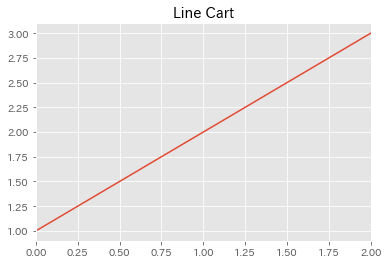

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


ax = pd.Series([1,2,3]).plot()
ax.set_title('Line Cart')
plt.style.use('ggplot')
plt.show()

### Seriesからプロットする

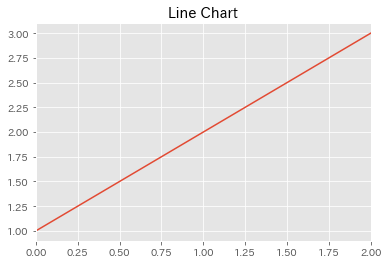

In [7]:
ser = pd.Series([1,2,3])
ax = ser.plot()
ax.set_title('Line Chart')
plt.show()

### DataFrameからプロットする
- 列数に応じた要素が描画
- インデックスがX軸、各列の値がY列

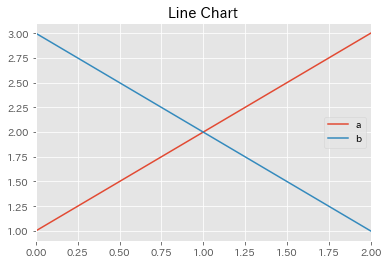

In [9]:
df = pd.DataFrame({'a' : [1,2,3], 'b' : [3,2,1]})
ax = df.plot()
ax.set_title('Line Chart')
plt.show()

### 折れ線グラフを作成する

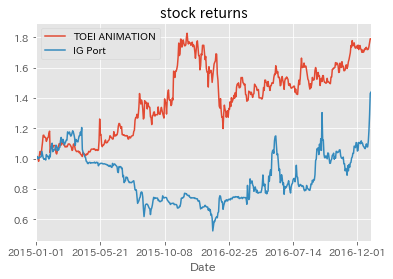

In [10]:
anime_stock_returns_csv ='anime/anime_stock_returns.csv'
anime_stock_returns_df = pd.read_csv(anime_stock_returns_csv, index_col=0)
ax = anime_stock_returns_df.plot()
ax.set_title('stock returns')
plt.show()

### Y軸の範囲が異なる場合
- キーワード引数secondary_yに2軸目となる列名をリスト型で指定
- Y軸のラベルはset_ylabel(), right_ax.set_ylabelで指定

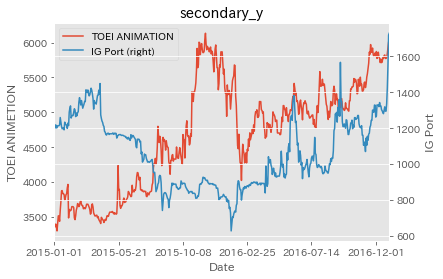

In [11]:
anime_stock_price_csv = 'anime/anime_stock_price.csv'
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0)

ax = anime_stock_price_df.plot(secondary_y=['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMETION')
ax.right_ax.set_ylabel('IG Port')
plt.show()

### 複数の図に分割する場合
- plotメソッドのキーワード引数subplotsにTrueを設定する

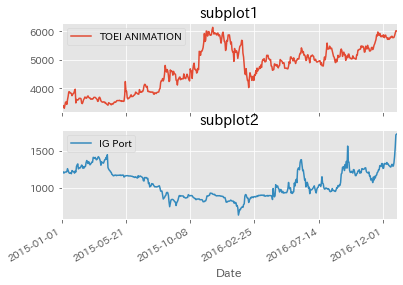

In [12]:
ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

### 散布図を作成する
- plot.scatterメソッドを使用

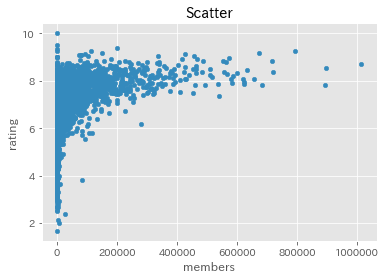

In [14]:
anime_master_csv= 'anime/anime_master.csv'
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

### 棒グラフを作成
- plot.bar()を使用

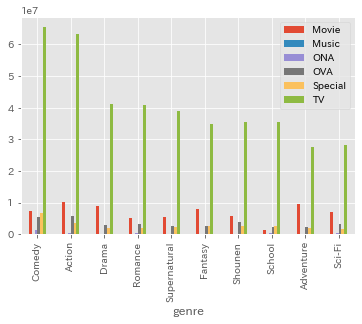

In [15]:
anime_genre_top10_pivoted_csv = 'anime/anime_genre_top10_pivoted.csv'
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

In [16]:
anime_genre_top10_pivoted_df.head()

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0


### 対数軸に変更する場合
- キーワード引数logyにTrueを設定する

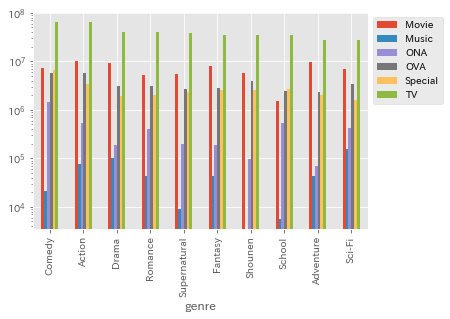

In [17]:
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

### 積み上げ棒グラフにする場合
- キーワード引数stackedにTrueを設定

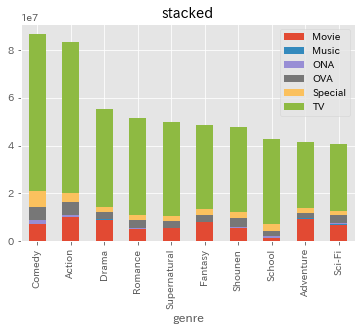

In [18]:
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('stacked')
plt.show()

### ヒストグラムを作成する
- histメソッドを使用する、キーワード引数binsに整数値を設定することでビンの数を変更できる

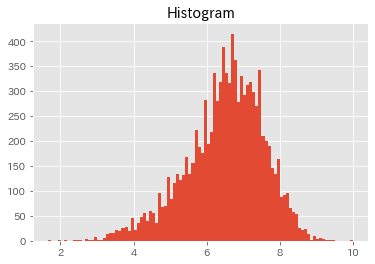

In [19]:
ax = anime_master_df['rating'].hist(bins=100)
ax.set_title('Histogram')
plt.show()

### 箱ひげ図を作成する
- plot.boxを使用する

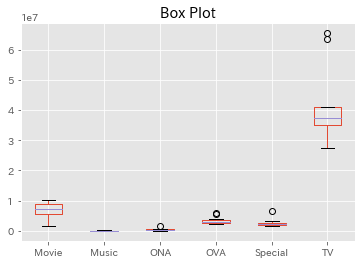

In [20]:
ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')
plt.show()

### 円グラフを作成する
- plot.pie()を使用

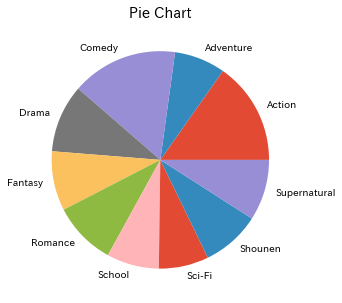

In [23]:
anime_genre_top10_csv = 'anime/anime_genre_top10.csv'
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)

ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5,5))
ax.set_title('Pie Chart')
# Y軸ラベルを削除'
ax.set_ylabel('')
plt.show()